
# Содержание
    
[Описание проекта](#project)
1. [Загрузка данных и изучение общей информации](#start)

2. [Предобработка данных](#preprocessing)
   
3. [Изучение и проверка данных.](#data)

    3.1 [Количество событий в логе.](#data1)
    
    3.2  [Количество пользователей в логе.](#data2)
    
    3.3  [Сколько в среднем событий приходится на пользователя.](#data3)
    
    3.4  [Изучние временного интервала в данных.](#data4)
    
    3.5  [Проверка корректности распределения пользователей на группы.](#data5)


4. [Изучите воронку событий.](#funnel)

    4.1 [Посмотрите, какие события есть в логах, как часто они встречаются. Отсортируйте события по частоте.](#funnel1)
    
    4.2  [Посчитайте, сколько пользователей совершали каждое из этих событий. Отсортируйте события по числу пользователей. Посчитайте долю пользователей, которые хоть раз совершали событие.](#funnel2)
    
    4.3  [Предположите, в каком порядке происходят события. Все ли они выстраиваются в последовательную цепочку? Их не нужно учитывать при расчёте воронки.](#funnel3)
    
    4.4  [По воронке событий посчитайте, какая доля пользователей проходит на следующий шаг воронки (от числа пользователей на предыдущем). То есть для последовательности событий A → B → C посчитайте отношение числа пользователей с событием B к количеству пользователей с событием A, а также отношение числа пользователей с событием C к количеству пользователей с событием B.](#funnel4)
    
    4.5  [На каком шаге теряете больше всего пользователей?](#funnel5)
    
    4.6  [Какая доля пользователей доходит от первого события до оплаты?](#funnel6)
    
5.  [Изучите результаты эксперимента.](#analysis)

    5.1  [Сколько пользователей в каждой экспериментальной группе?](#analysis1)
    
    5.2  [Есть 2 контрольные группы для А/А-эксперимента, чтобы проверить корректность всех механизмов и расчётов. Проверьте, находят ли статистические критерии разницу между выборками 246 и 247.](#analysis2)
    
    5.3  [Выберите самое популярное событие. Посчитайте число пользователей, совершивших это событие в каждой из контрольных групп. Посчитайте долю пользователей, совершивших это событие. Проверьте, будет ли отличие между группами статистически достоверным. Проделайте то же самое для всех других событий (удобно обернуть проверку в отдельную функцию). Можно ли сказать, что разбиение на группы работает корректно?](#analysis3)
    
    5.4  [Аналогично поступите с группой с изменённым шрифтом. Сравните результаты с каждой из контрольных групп в отдельности по каждому событию. Сравните результаты с объединённой контрольной группой. Какие выводы из эксперимента можно сделать?](#analysis4)
    
    5.5 [Какой уровень значимости вы выбрали при проверке статистических гипотез выше? Посчитайте, сколько проверок статистических гипотез вы сделали.](#analysis5)
   
6. [Результаты исследования.](#rec)


<a id="project"></a> 
# Описание проекта

Вы работаете в стартапе, который продаёт продукты питания. Нужно разобраться, как ведут себя пользователи вашего мобильного приложения. 


Изучите воронку продаж. Узнайте, как пользователи доходят до покупки. Сколько пользователей доходит до покупки, а сколько — «застревает» на предыдущих шагах? На каких именно?


После этого исследуйте результаты A/A/B-эксперимента. Дизайнеры захотели поменять шрифты во всём приложении, а менеджеры испугались, что пользователям будет непривычно. Договорились принять решение по результатам A/A/B-теста. Пользователей разбили на 3 группы: 2 контрольные со старыми шрифтами и одну экспериментальную — с новыми. Выясните, какой шрифт лучше.


**Задачи исследования:**

- Изучить воронку продаж.

- Исследовать результаты A/A/B-эксперимента.

**Цель исследования:**
1. Разобраться, как ведут себя пользователи мобильного приложения. 
2. Выяснить, какой шрифт лучше.


**Описание данных**

Скачать датасет: https://code.s3.yandex.net/datasets/logs_exp.csv

Путь к файлу: /datasets/logs_exp.csv. 

Каждая запись в логе — это действие пользователя, или событие. 
- `'EventName'` — название события;
- `'DeviceIDHash'` — уникальный идентификатор пользователя;
- `'EventTimestamp'` — время события;
- `'ExpId'` — номер эксперимента: 246 и 247 — контрольные группы, а 248 — экспериментальная.

### Откройте файл с данными и изучите общую информацию
<a id="start"></a> 

Импорт необходимых для работы библиотек.

In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', None) #код, который выводит максимальную ширину столбцов таблицы
pd.options.display.max_colwidth = 150
pd.set_option('display.max_columns', None) #код, который выводит все колонки таблицы
pd.options.display.float_format = '{:.2f}'.format #код отображает float с двумя знаками после точки

import seaborn as sns
from plotly import graph_objects as go
sns.set_theme(style='whitegrid')
sns.color_palette()

import matplotlib.pyplot as plt

import datetime as dt
from datetime import datetime, timedelta

from IPython.display import display_html
from ipywidgets import widgets, Layout#библиотеки, использовались для вывода сразу нескольких доблиц в строке


import datetime as dt

from scipy import stats as st
import numpy as np
import math as mth
from statsmodels.sandbox.stats.multicomp import multipletests

Открытие файлов с данными и изучение общей информации.

In [2]:
try:
    data = pd.read_csv('/datasets/logs_exp.csv', sep='\t')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/logs_exp.csv', sep='\t')

In [3]:
#функция для ознакомления с основной информацией
def information_df(metod): 
    print('Ознакомимся с таблицей, для этого выведем первые 5 строк на экран.')
    display(metod.head())
    print('-'* 25)    
    print('Выведем основную информацию таблицы с помощью метода info().')
    print(' ')
    display(metod.info())
    print('-'* 25)
    print('Количество явных дубликатов  в таблице:', metod.duplicated().sum())
    print('-'* 25)
    print('Количество пропущенных значений в таблице:')
    display(metod.isna().sum())

In [4]:
information_df(data)

Ознакомимся с таблицей, для этого выведем первые 5 строк на экран.


,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


-------------------------
Выведем основную информацию таблицы с помощью метода info().
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


None

-------------------------
Количество явных дубликатов  в таблице: 413
-------------------------
Количество пропущенных значений в таблице:


EventName         0
DeviceIDHash      0
EventTimestamp    0
ExpId             0
dtype: int64

**После проверки исходного датафрейма:**

- таблица состоит из 4 столбцов и 244126 строк;


- пропуски в данных отсутствуют;


- в таблице имеется 413 дубликатов, так как их объем незначительный, следует их удалить;


- столбец `'EventTimestamp'` содержит дату и время события, которые необходимо привести в формат 'datetime'.

### Предобработка данных
<a id="preprocessing"></a> 

#### Замена названия столбцов

In [5]:
data = data.rename(
    columns={
     'EventName': 'event_name', 
     'DeviceIDHash':'device_id', 
     'EventTimestamp': 'event_timestamp', 
     'ExpId': 'group' 
 }
)

#### Проверка пропусков и типов данных

In [6]:
#выведем количество уникальных значений в столбце 'device_id'
print(
    'Количество уникальных пользователей:',
    data['device_id'].nunique()
)

Количество уникальных пользователей: 7551


Пропуски в датафрейме отсутствуют, однако имеются дубликаты.

Избавимся от дубликатов.

In [7]:
len_data = data.shape[0] #переменная с исходной длинной таблицы
print('Количество строк исходного датафрейма:', len_data)

Количество строк исходного датафрейма: 244126


In [8]:
data = data.drop_duplicates().reset_index(drop=True) #удалим дубликаты и заменим индексы

In [9]:
print('Оставшийся процент данных:', round((data.shape[0]/len_data)*100, 2), '%')

Оставшийся процент данных: 99.83 %


#### Добавление столбца с датой и временем, а также отдельного столбеца с датой

In [10]:
data['datetime'] = pd.to_datetime(data['event_timestamp'], unit='s') # столбец с датой и временем
data['date'] = data['datetime'].astype('datetime64[D]') #столбец с датой
data.dtypes

event_name                 object
device_id                   int64
event_timestamp             int64
group                       int64
datetime           datetime64[ns]
date               datetime64[ns]
dtype: object

**По итогам подготовки данных для дальнейшего исследования:**

- заменены названия столбцов;


- удалены дубликаты; 


- созданы 2 новых столбца: первый - с датой и временем, второй - с датой.

### Изучение и проверка данных
<a id="data"></a> 

#### Количество событий в логе.
<a id="data1"></a> 

In [11]:
#каждая стока датафрейма - событие, посчитаем количество строк
print('Всего событий:', len(data['event_name']))

Всего событий: 243713


In [12]:
#выведем количество уникальных значений в столбце 'event_name', а также список этих событий
print('Количество уникальных событий:', data['event_name'].nunique())
print('Список уникальных событий:', list(data['event_name'].unique()))

Количество уникальных событий: 5
Список уникальных событий: ['MainScreenAppear', 'PaymentScreenSuccessful', 'CartScreenAppear', 'OffersScreenAppear', 'Tutorial']


#### Количество пользователей в логе.
<a id="data2"></a> 

In [13]:
#выведем количество уникальных значений в столбце 'device_id'
print(
    'Количество уникальных пользователей:',
    data['device_id'].nunique()
)

Количество уникальных пользователей: 7551


#### Сколько в среднем событий приходится на пользователя.
<a id="data3"></a> 

In [14]:
#разделим общее количество событий на количество уникальных пользователей
print(
    'Количество событий на пользователя:',
    round(len(data['event_name'])/data['device_id'].nunique(), 2)
)

Количество событий на пользователя: 32.28


In [15]:
print(
    'Количество уникальных событий на пользователя:',
    round(
#группировка уникальных событий по id пользователей
        data.groupby('device_id').agg({'event_name': 'nunique'})['event_name']
#среднее значение уникальных событий на пользователя
        .mean(),
        2
        )
    )

Количество уникальных событий на пользователя: 2.67


#### Изучние временного интервала в данных.
<a id="data4"></a> 

**Данными за какой период вы располагаете? Найдите максимальную и минимальную дату.**

In [16]:
print('Временной интервал таблицы orders:', \
      data['date'].min().strftime('%d/%m/%Y'), '-', \
      data['date'].max().strftime('%d/%m/%Y'))

Временной интервал таблицы orders: 25/07/2019 - 07/08/2019


**Постройте гистограмму по дате и времени. Можно ли быть уверенным, что у вас одинаково полные данные за весь период?**

Технически в логи новых дней по некоторым пользователям могут «доезжать» события из прошлого — это может «перекашивать данные».

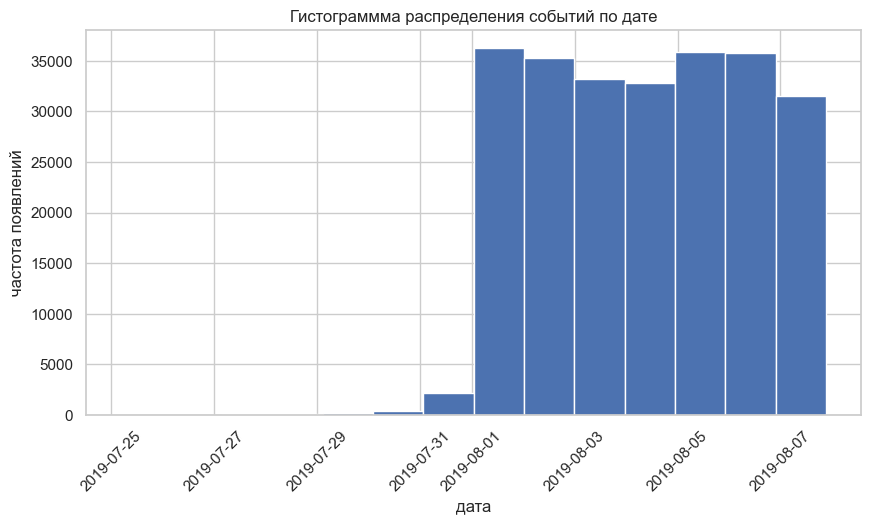

In [17]:
#рассчитаем количество корзин для гистограммы, для этого найдем временной промежуток в целых днях
bins = round((data['datetime'].max() - data['datetime'].min()) / np.timedelta64(1, 'D'))
data.hist('datetime', bins=bins, figsize=(10, 5))
plt.xticks(rotation= 45)
plt.xlabel('дата')
plt.ylabel('частота появлений')
plt.title('Гистограммма распределения событий по дате')

plt.show()

Исходя из полученной гистограммы, можно отметить, что за период с 25.07.2019 по 07.08.2019 (2 недели) объем событий распределен неравномерно. 

А именно, в первую неделю количество событий незначительно.

**Определите, с какого момента данные полные и отбросьте более старые. Данными за какой период времени вы располагаете на самом деле?**

 Периодом, за который указаны полные данные, следует считать вторую неделю, а именно 01.08.2019 - 07.08.2019.

In [18]:
#создадим новую переменную с отфильтрованной таблицей
data_filtr = data[data['datetime'] >= '2019-08-01']

Проверим новый временной интервал.

In [19]:
print('Период с полными данными для исследования:', \
      data_filtr['date'].min().strftime('%d/%m/%Y'), '-', \
      data_filtr['date'].max().strftime('%d/%m/%Y'))

Период с полными данными для исследования: 01/08/2019 - 07/08/2019


**Много ли событий и пользователей вы потеряли, отбросив старые данные?**

In [20]:
print('Количество убранных строк:', data.shape[0] - data_filtr.shape[0])
print('Оставшийся процент данных:', round(data_filtr.shape[0]/len_data, 2)*100, '%')

#добавлено
print('Количество убранных уникальных пользователей:', data['device_id'].nunique() - data_filtr['device_id'].nunique())
print('Процент убранных данных:', 100 - (round(data_filtr.shape[0]/len_data, 2)*100), '%')

Количество убранных строк: 2826
Оставшийся процент данных: 99.0 %
Количество убранных уникальных пользователей: 17
Процент убранных данных: 1.0 %


После удаления дубликатов,  а также недостаточных для исследования данных, было отброшено 1% пользователей

После фильтрации повторно найдем необходимые параметры.

In [21]:
print('Всего событий:', len(data_filtr['event_name']))

print('Количество уникальных событий:', data_filtr['event_name'].nunique())

print('Список уникальных событий:', list(data_filtr['event_name'].unique()))

print(
    'Количество уникальных пользователей:',
    data_filtr['device_id'].nunique()
)

print(
    'Количество событий на пользователя:',
    round(len(data_filtr['event_name'])/data_filtr['device_id'].nunique(), 2)
)

print(
    'Количество уникальных событий на пользователя:',
    round(
        data_filtr.groupby('device_id').agg({'event_name': 'nunique'})['event_name'].mean(), 
        2
        )
    )

Всего событий: 240887
Количество уникальных событий: 5
Список уникальных событий: ['Tutorial', 'MainScreenAppear', 'OffersScreenAppear', 'CartScreenAppear', 'PaymentScreenSuccessful']
Количество уникальных пользователей: 7534
Количество событий на пользователя: 31.97
Количество уникальных событий на пользователя: 2.67


#### Проверка корректности распределения пользователей на группы.
<a id="data5"></a> 

In [22]:
#создадим таблицы сгруппированные по id пользователей для каждой группы и объеденим их
(
    data_filtr[data_filtr['group'] == 246].pivot_table(index='device_id').reset_index()
).merge(
    (data_filtr[data_filtr['group'] == 247].pivot_table(index='device_id').reset_index()), on='device_id')\
.merge(
    (data_filtr[data_filtr['group'] == 248].pivot_table(index='device_id').reset_index()), on='device_id').reset_index()

,index,event_timestamp_x,group_x,event_timestamp_y,group_y,device_id,event_timestamp,group


Уникальные id пользователей не повторяются между группами. Следовательно распределение пользователей корректное.

Найдем количество пользователей в каждой группе.

In [23]:
data_filtr.groupby('group').agg({'device_id': 'nunique'}).T

group,246,247,248
device_id,2484,2513,2537


На этапе изучения и проверки исходных данных:

- временной период датафрейма : **25/07/2019 - 07/08/2019**;


- полными данными из всего представленного временного интервала обладают данные за период: с **01/08/2019 по 07/08/2019**;


- временной интервал с неполными данными для дальнейшего исследования был отброшен; 


- количество убранных строк от начального датафрейма - 2826;


- оставшийся процент данных - 98.0 %; 


- всего событий: 243713; после фильтрации временного интервала - **240887**;


- количество уникальных событий до и после фильтрации - **5**;


- количество уникальных пользователей: 7551; после фильтрации - **7534**;


- количество событий на пользователя: 32.28; после фильтрации - **31.97**;


- распределение пользователей для тестирования на группы корректное: **в 246 группе - 2483 пользователя, в 247 - 2512 пользователей, в 248 - 2535 пользователей**.

### Изучите воронку событий
<a id="funnel"></a>

#### Посмотрите, какие события есть в логах, как часто они встречаются. Отсортируйте события по частоте.
<a id="funnel1"></a>

In [24]:
event_count = data_filtr.groupby('event_name').agg({'device_id': 'count'}).sort_values('device_id', ascending=False)

plt.figure(figsize=(4,4))
pie_event = plt.pie(list(event_count['device_id']), labels=list(event_count.index), autopct='%.0f%%');

widget1 = widgets.Output()
widget2 = widgets.Output()
 
with widget1:
    print(' ')
    print(' ')
    #print('\033[1m' + 'Таблица количества событий' + '\033[0m')
    display(event_count.style.background_gradient(subset=['device_id'], cmap='Blues'))
with widget2:
    plt.title('Диаграмма распределение количества событий',fontsize=11, fontweight='heavy')
    plt.show(pie_event)
    
box_layout = Layout(display='flex',
                    flex_flow='row',
                    justify_content='space-around',
                    width='950px'
                   )
hbox = widgets.HBox([widget1, widget2], layout=box_layout)
hbox

In [70]:
print(event_count.to_markdown())
from IPython.display import display, HTML
display(HTML(event_count.to_html()))

event_count = data_filtr.groupby('event_name').agg({'device_id': 'count'}).sort_values('device_id', ascending=False)

plt.figure(figsize=(4,4))
pie_event = plt.pie(list(event_count['device_id']), labels=list(event_count.index), autopct='%.0f%%');

widget1 = widgets.Output()
widget2 = widgets.Output()
 
with widget1:
    print(' ')
    print(' ')
    #print('\033[1m' + 'Таблица количества событий' + '\033[0m')
    display(HTML(event_count.to_html()))
with widget2:
    plt.title('Диаграмма распределение количества событий',fontsize=11, fontweight='heavy')
    plt.show(pie_event)
    
box_layout = Layout(display='flex',
                    flex_flow='row',
                    justify_content='space-around',
                    width='950px'
                   )
hbox = widgets.HBox([widget1, widget2], layout=box_layout)
hbox

| event_name              |   device_id |
|:------------------------|------------:|
| MainScreenAppear        |      117328 |
| OffersScreenAppear      |       46333 |
| CartScreenAppear        |       42303 |
| PaymentScreenSuccessful |       33918 |
| Tutorial                |        1005 |


,device_id
event_name,
MainScreenAppear,117328
OffersScreenAppear,46333
CartScreenAppear,42303
PaymentScreenSuccessful,33918
Tutorial,1005


В датафрейме имеется 5 уникальных события. Самым многочисленным является уникальное событие 'MainScreenAppear', в датафрейме оно повторялось 117328 раз, а его объем составляет 49%.  Количество событий 'OffersScreenAppear', 'CartScreenAppear' и 'PaymentScreenSuccessful' значительно ниже, чем у предыдущего. Их количество составляет 46333, 42303 и 33918, соответственно. Самым немногочисленным событием является 'Tutorial', за рассматриваемый период, данное событие повторилось всего 1005 раз.

#### Посчитайте, сколько пользователей совершали каждое из этих событий. Отсортируйте события по числу пользователей. Посчитайте долю пользователей, которые хоть раз совершали событие.
<a id="funnel2"></a>

In [55]:
event_unique = data_filtr.groupby('event_name').agg(
    {'device_id': 'nunique'}).sort_values('device_id', ascending=False)

event_unique['share'] = (
    event_unique['device_id'] / (len(data_filtr['device_id'].unique()))
).apply('{:.2%}'.format) 

plt.figure(figsize=(4,3))
barplot_unique = sns.barplot(data=event_unique, x='device_id', y=event_unique.index, orient='h')


widget1 = widgets.Output()
widget2 = widgets.Output()
 
with widget1:
    print(' ')
    print(' ')
    display(event_unique.style.background_gradient(subset=['device_id'], cmap='Blues'))
with widget2:
    plt.title(r'Диаграмма распределения пользователей между событиями', fontsize=11, fontweight='heavy')
    plt.xlabel('частота повторений')
    plt.ylabel(r' ');
    plt.show(barplot_unique)
    
box_layout = Layout(display='flex',
                    flex_flow='row',
                    justify_content='space-around',
                    width='950px'
                   )
hbox = widgets.HBox([widget1, widget2], layout=box_layout)
hbox

По составленным в таблице данным можно сказать, что 

- 98,47% пользователей совершили событие 'MainScreenAppear', также можно отметить, что 1,53% (115 пользователей) за весь временной интервал исследования не совершили данное действие. Возможно, у этих пользователей возникают каки-либо тезнические проблемы с приложением;

- количество пользователей, совершивших событие 'OffersScreenAppear'  значительно уменьшается, и их доля составляет 60,96%;

- события 'CartScreenAppear' и 'PaymentScreenSuccessful' совершают еще меньшее количество людей, 49,56% и 46,97%, соответственно;

- крайне малое количество пользователей переходит в раздел 'Tutorial', что является стандартным явлением для ознакомительного события.

#### Предположите, в каком порядке происходят события. Все ли они выстраиваются в последовательную цепочку? Их не нужно учитывать при расчёте воронки.
<a id="funnel3"></a>

Последовательность выполнения каждого события будет выстраиваются в последовательную цепочку:

 - MainScreenAppear - Появится главный экран

- OffersScreenAppear - Появится экран предложений

- CartScreenAppear - Появится экран корзины

- PaymentScreenSuccessful	- Экран оплаты прошел успешно


Событие Tutorial является не обязательным, ознакомительным для пользователя событием. По этой причине его доля среди всех событий крайне мала. Поэтому для дальнейшего анализа его следует исключить.

Уберем из анализа необязательное событие Tutorial.

In [26]:
data_filtr = data_filtr.query('event_name != "Tutorial"')

In [27]:
print('Оставшийся процент данных:', round(data_filtr.shape[0]/data.shape[0], 2)*100, '%')

Оставшийся процент данных: 98.0 %


Построим диаграмму воронки событий для всех групп и отдельно по каждой группе.

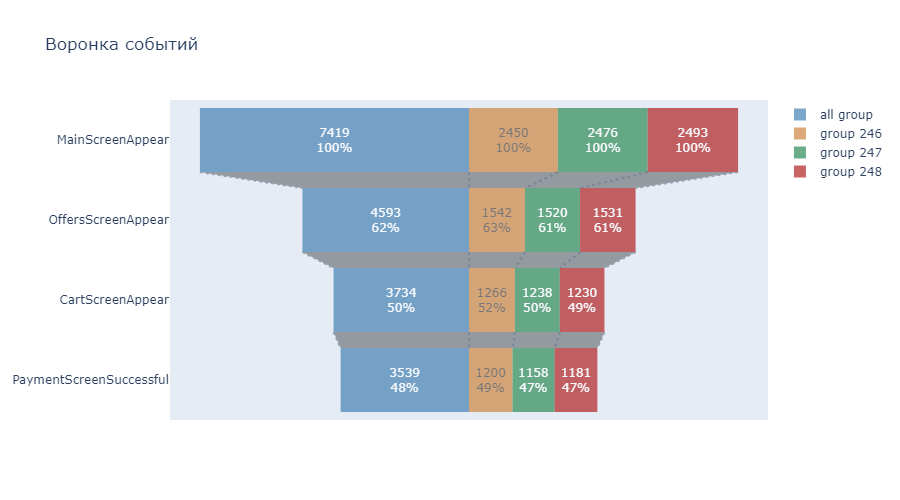

In [49]:
event_unique_group = data_filtr.groupby(['event_name', 'group']).agg(
    {'device_id': 'nunique'}).sort_values(['device_id', 'event_name'], ascending=False).reset_index()

event_unique_new = data_filtr.groupby('event_name').agg(
    {'device_id': 'nunique'}).sort_values('device_id', ascending=False)

event_unique_new['share'] = (
    event_unique_new['device_id'] / (len(data_filtr['device_id'].unique()))
).apply('{:.2%}'.format) 

event_unique_new.columns = ['count_users', 'share_users']


fig = go.Figure()

#добавлен заголовок
fig.update_layout(
    title={'text': "Воронка событий"},
    width=900,
    height=500) 
    
    
fig.add_trace(go.Funnel(
    name = 'all group',
    y = event_unique_new.reset_index()['event_name'].tolist(),
    x = event_unique_new.reset_index()['count_users'].tolist(),
    textinfo = 'value+percent initial',
    opacity = 0.7, marker = {'color': ['steelblue', 'steelblue', 'steelblue', 'steelblue']},
    connector = {'line': {'color': 'slategray', 'dash': 'dot', 'width': 2}}))

fig.add_trace(go.Funnel(
    name = 'group 246',
    orientation = 'h',    
    y = event_unique_group[event_unique_group['group']== 246]['event_name'].tolist(),
    x = event_unique_group[event_unique_group['group']== 246]['device_id'].tolist(),
    textinfo = 'value+percent initial',
    opacity = 0.7, marker = {'color': ['peru', 'peru', 'peru', 'peru']},
    connector = {'line': {'color': 'slategray', 'dash': 'dot', 'width': 2}}))

fig.add_trace(go.Funnel(
    name = 'group 247',
    orientation = 'h',
    y = event_unique_group[event_unique_group['group']== 247]['event_name'].tolist(),
    x = event_unique_group[event_unique_group['group']== 247]['device_id'].tolist(),
    textposition = 'inside',
    textinfo = 'value+percent initial',
    opacity = 0.7, marker = {'color': ['seagreen', 'seagreen', 'seagreen', 'seagreen']},
    connector = {'line': {'color': 'slategray', 'dash': 'dot', 'width': 2}}))

fig.add_trace(go.Funnel(
    name = 'group 248',
    orientation = 'h',
    y = event_unique_group[event_unique_group['group']== 248]['event_name'].tolist(),
    x = event_unique_group[event_unique_group['group']== 248]['device_id'].tolist(),
    textposition = 'inside',
    textinfo = 'value+percent initial',
    opacity = 0.7, marker = {'color': ['firebrick', 'firebrick', 'firebrick', 'firebrick']},
    connector = {'line': {'color': 'slategray', 'dash': 'dot', 'width': 2}}))

fig.show()
fig.show("png")

В разбивке по группам наибольший процент пользователей совершают каждое событие в группе 246. 

Так событие 'OffersScreenAppear' совершают 63% пользователей группы 246, что на 2% больше, чем в группах 247 и 248. 

Событие 'CartScreenAppear' совершают 52% пользователей группы 246, что на 2% и 3% больше, чем у групп 247 и 248.

Событие 'PaymentScreenSuccessful' совершают 48% пользователей группы 246, что на 2% больше, чем у групп 247 и 248.

#### По воронке событий посчитайте, какая доля пользователей проходит на следующий шаг воронки (от числа пользователей на предыдущем). То есть для последовательности событий A → B → C посчитайте отношение числа пользователей с событием B к количеству пользователей с событием A, а также отношение числа пользователей с событием C к количеству пользователей с событием B.
<a id="funnel4"></a>

Добавим в таблицу 'event_unique_new' 2 новых столбца с абсолютным и относительным изменением пользователей, проходящих на следующий шаг воронки.

In [29]:
#добалено
#выделим необходимую строку столбца 'count_users' с помощью индекса и запишем значение в отдельную переменную
fill_value_all = event_unique_new['count_users'].iloc[0]

event_unique_new['loss _users'] = (
    event_unique_new['count_users'] - event_unique_new['count_users']
.shift(1,fill_value=fill_value_all) 
)
event_unique_new['share_next_event'] = (
    event_unique_new['count_users'] / event_unique_new['count_users'].shift(1,fill_value=fill_value_all)
)
event_unique_new


,count_users,share_users,loss _users,share_next_event
event_name,,,,
MainScreenAppear,7419,98.53%,0,1.00
OffersScreenAppear,4593,61.00%,-2826,0.62
CartScreenAppear,3734,49.59%,-859,0.81
PaymentScreenSuccessful,3539,47.00%,-195,0.95


Построи воронку событий с долей пользователей, проходящих на следующий шаг воронки, для всех групп и отдельно по каждой группе.

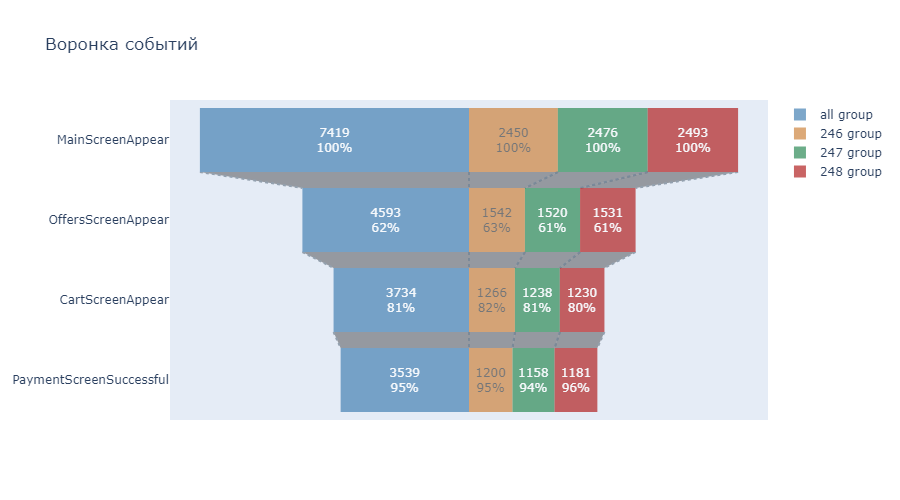

In [50]:
fig = go.Figure()
#добавлен заголовок
fig.update_layout(
    title={'text': "Воронка событий"},
    width=900,
    height=500)

fig.add_trace(go.Funnel(
    name = 'all group',
    y = event_unique_new.reset_index()['event_name'].tolist(),
    x = event_unique_new.reset_index()['count_users'].tolist(),
    textinfo = 'value+percent previous',
    opacity = 0.7, marker = {'color': ['steelblue', 'steelblue', 'steelblue', 'steelblue']},
    connector = {'line': {'color': 'slategray', 'dash': 'dot', 'width': 2}}))

fig.add_trace(go.Funnel(
    name = '246 group',
    orientation = 'h',
    y = event_unique_group[event_unique_group['group']== 246]['event_name'].tolist(),
    x = event_unique_group[event_unique_group['group']== 246]['device_id'].tolist(),
    textinfo = 'value+percent previous',
    opacity = 0.7, marker = {'color': ['peru', 'peru', 'peru', 'peru']},
    connector = {'line': {'color': 'slategray', 'dash': 'dot', 'width': 2}}))

fig.add_trace(go.Funnel(
    name = '247 group',
    orientation = 'h',
    y = event_unique_group[event_unique_group['group']== 247]['event_name'].tolist(),
    x = event_unique_group[event_unique_group['group']== 247]['device_id'].tolist(),
    textposition = 'inside',
    textinfo = 'value+percent previous',
    opacity = 0.7, marker = {'color': ['seagreen', 'seagreen', 'seagreen', 'seagreen']},
    connector = {'line': {'color': 'slategray', 'dash': 'dot', 'width': 2}}))

fig.add_trace(go.Funnel(
    name = '248 group',
    orientation = 'h',
    y = event_unique_group[event_unique_group['group']== 248]['event_name'].tolist(),
    x = event_unique_group[event_unique_group['group']== 248]['device_id'].tolist(),
    textposition = 'inside',
    textinfo = 'value+percent previous',
    opacity = 0.7, marker = {'color': ['firebrick', 'firebrick', 'firebrick', 'firebrick']},
    connector = {'line': {'color': 'slategray', 'dash': 'dot', 'width': 2}}))

fig.show()
fig.show("png")

По составленным данным в таблице и диаграмме можно сказать, что

в среднем 62% пользователей проходят на шаг 'OffersScreenAppear' воронки событий от 'MainScreenAppear';


от события 'OffersScreenAppear' к событию 'CartScreenAppear' в среднем проходит 81% пользователей;


наибольший процент пользователей проходят от события 'CartScreenAppear' к событию 'PaymentScreenSuccessful', в среднем это 95% пользователей;

#### На каком шаге теряете больше всего пользователей?
<a id="funnel5"></a>

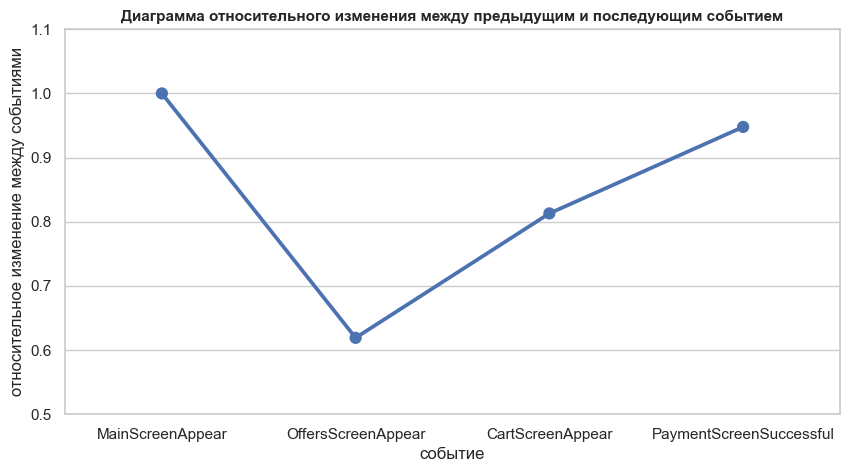

In [31]:
plt.figure(figsize=(10,5))
sns.pointplot(
    x=event_unique_new.index, 
    y=event_unique_new['share_next_event'])
plt.ylim(0.5, 1.1);
plt.title(r'Диаграмма относительного изменения между предыдущим и последующим событием', fontsize=11, fontweight='heavy')
plt.xlabel('событие')
plt.ylabel(r'относительное изменение между событиями');

plt.show()

На основании построенных выше воронки событий и графика относительного изменения между событиями можно с уверенностью сказать, что на шаге от 'MainScreenAppear' к 'OffersScreenAppear' теряется набольший процент пользователей. 

В группе 246 теряется около 37% пользователей, что на 2% меньше, чем у групп 247 и 248.

В сумме по всем группам на шаг 'OffersScreenAppear' не переходит 2826 пользователя или 38%.

#### Какая доля пользователей доходит от первого события до оплаты?
<a id="funnel6"></a>

In [32]:
event_unique_new
print('Доля пользователей, проходящих от первого события до оплаты:',
      round(event_unique_new['count_users'].iloc[-1]/event_unique_new['count_users'].iloc[0] * 100, 2),
      '%'
)

Доля пользователей, проходящих от первого события до оплаты: 47.7 %


**Выводы по разделу:**

- Самым многочисленным событием является 'MainScreenAppear'. Самым немногочисленным событием является 'Tutorial'.


- событие 'MainScreenAppear' совершили 98,47% пользователей, событие 'OffersScreenAppear' - 60,96% пользователей; события 'CartScreenAppear' и 'PaymentScreenSuccessful' совершают еще меньшее количество людей, 49,56% и 46,97%, соответственно;


- На шаге от 'MainScreenAppear' к 'OffersScreenAppear' теряется набольший процент пользователей.

- Доля пользователей, проходящих от первого события до оплаты: 47.7 %.

### Изучите результаты эксперимента
<a id="analysis"></a> 

#### Сколько пользователей в каждой экспериментальной группе?
<a id="analysis1"></a> 

In [33]:
#найдем общее количество всех уникальных пользователей перед началом тестирования
print(
    'Количество уникальных пользователей:',
    data_filtr['device_id'].nunique()
)

Количество уникальных пользователей: 7530


In [34]:
data_filtr.groupby('group').agg(AllUsersUnique=('device_id', 'nunique'))

,AllUsersUnique
group,
246,2483
247,2512
248,2535


#### Есть 2 контрольные группы для А/А-эксперимента, чтобы проверить корректность всех механизмов и расчётов. Проверьте, находят ли статистические критерии разницу между выборками 246 и 247.
<a id="analysis2"></a> 

In [35]:
#Составим таблицу с количеством пользователей по событиям для каждой группы.

#таблица с количеством уникальных пользователей по каждому событию на каждую группу
event_users_unique = data_filtr.pivot_table(
    columns='group', index='event_name', values='device_id', aggfunc=['nunique']
).reset_index()
event_users_unique.columns = ['event_name', 'A', 'A1', 'B']
event_users_unique['A+A1'] = event_users_unique['A'] + event_users_unique['A1']

#таблица с общим количеством уникальных пользователей в группе
all_users_unique = data_filtr.groupby('group').agg(AllUsersUnique=('device_id', 'nunique')).T.reset_index()
all_users_unique.columns = ['event_name', 'A', 'A1', 'B']
all_users_unique['A+A1'] = all_users_unique['A'] + all_users_unique['A1']

#объеденим полученные таблицы
event_users_group = pd.concat([all_users_unique, event_users_unique]).sort_values('A', ascending=False).reset_index(drop=True)
event_users_group['share_A'] = event_users_group['A'][1:5] / event_users_group['A'][0]
event_users_group['share_A1'] =event_users_group['A1'][1:5] / event_users_group['A1'][0]
event_users_group['share_B'] = event_users_group['B'][1:5] / event_users_group['B'][0]
event_users_group['share_A+A1'] = event_users_group['A+A1'][1:5] / event_users_group['A+A1'][0]
event_users_group = event_users_group.fillna(1)
event_users_group

,event_name,A,A1,B,A+A1,share_A,share_A1,share_B,share_A+A1
0,AllUsersUnique,2483,2512,2535,4995,1.00,1.00,1.00,1.00
1,MainScreenAppear,2450,2476,2493,4926,0.99,0.99,0.98,0.99
2,OffersScreenAppear,1542,1520,1531,3062,0.62,0.61,0.60,0.61
3,CartScreenAppear,1266,1238,1230,2504,0.51,0.49,0.49,0.50
4,PaymentScreenSuccessful,1200,1158,1181,2358,0.48,0.46,0.47,0.47


Проверим, находят ли статистические критерии разницу между выборками 246 и 247 контрольной группой.


Сформулируем гипотезы.

**Нулевая гипотеза: Н0 = Различий между выборками 246 и 247 контрольной группой нет.**(для каждого события)

**Альтернативная гипотеза: H_a: = Различия между выборками 246 и 247 контрольной группой есть.**(для каждого события)

В качестве уровня критической значимости установим 0.05

Посчитаем статистическую значимость для события 'MainScreenAppear'.

In [36]:
#добавлено 
#выделим необходимые строки столбца с помощью индекса и запишем значение в отдельные переменные
s_1 = event_users_group.query('event_name == "MainScreenAppear"')['A'].iloc[0]
s_2 = event_users_group.query('event_name == "MainScreenAppear"')['A1'].iloc[0]
t_1 = event_users_group['A'].iloc[0]
t_2 = event_users_group['A1'].iloc[0]


alpha = .05 # критический уровень статистической значимости

successes = [s_1, s_2]#внесем данные из таблицы - количество пользователей в группе А и А1 по событию 'MainScreenAppear'
trials = [t_1, t_2]#всего пользователей в группе А и А1

# пропорция успехов в первой группе:
p1 = successes[0]/trials[0]

# пропорция успехов во второй группе:
p2 = successes[1]/trials[1]

# пропорция успехов в комбинированном датасете:
p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])

# разница пропорций в датасетах
difference = p1 - p2 

# считаем статистику в ст.отклонениях стандартного нормального распределения
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))

# задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
distr = st.norm(0, 1)  

p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'
    ) 

p-значение:  0.7526703436483038
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


p-значение больше уровня критической значимости, следовательно, нулевую гипотезу "Различий между выборками 246 и 247 контрольной группой нет" относительно события 'MainScreenAppear' не отвергаем.

Статистически значимых различий между контрольными группами нет.

#### Выберите самое популярное событие. Посчитайте число пользователей, совершивших это событие в каждой из контрольных групп. Посчитайте долю пользователей, совершивших это событие. Проверьте, будет ли отличие между группами статистически достоверным. Проделайте то же самое для всех других событий (удобно обернуть проверку в отдельную функцию). Можно ли сказать, что разбиение на группы работает корректно?
<a id="analysis3"></a> 

In [37]:
#создадим функцию для счетастатистической значимости для каждого события
def statistical_significance (df, group_1, group_2, alpha):
    event = ['MainScreenAppear', 'OffersScreenAppear', 'CartScreenAppear', 'PaymentScreenSuccessful']
    for x in event:
        event_df = df[df['event_name'] == x]
        successes1 = event_df[group_1]
        successes2 = event_df[group_2]
        trials1 = df[group_1].iloc[0]
        trials2 = df[group_2].iloc[0]

        successes = np.array([successes1, successes2])
        trials = np.array([trials1, trials2])

# пропорция успехов в первой группе:
        p1 = successes[0]/trials[0]

# пропорция успехов во второй группе:
        p2 = successes[1]/trials[1]
    
    # пропорция успехов в комбинированном датасете:
        p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])

# разница пропорций в датасетах
        difference = p1 - p2 

# считаем статистику в ст.отклонениях стандартного нормального распределения
        z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))

# задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
        distr = st.norm(0, 1)  

        p_value = (1 - distr.cdf(abs(z_value))) * 2

        print('Между группами', group_1, 'и', group_2, 'По событию', x)
        print('p-значение: ', p_value)
        if p_value < alpha:
            print('Отвергаем H0: между долями есть значимая разница')
            print(' ')
        else:
            print('\033[1m' + 'Не получилось отвергнуть H0: нет оснований считать доли разными' + '\033[0m')
            print(' ')

Проверим, находят ли статистические критерии разницу между выборками 246 и 247 контрольной группой по каждому событию


In [38]:
statistical_significance(event_users_group, 'A', 'A1', alpha=.05)

Между группами A и A1 По событию MainScreenAppear
p-значение:  [0.75267034]
Не получилось отвергнуть H0: нет оснований считать доли разными
 
Между группами A и A1 По событию OffersScreenAppear
p-значение:  [0.24786097]
Не получилось отвергнуть H0: нет оснований считать доли разными
 
Между группами A и A1 По событию CartScreenAppear
p-значение:  [0.22867644]
Не получилось отвергнуть H0: нет оснований считать доли разными
 
Между группами A и A1 По событию PaymentScreenSuccessful
p-значение:  [0.11446628]
Не получилось отвергнуть H0: нет оснований считать доли разными
 


По каждому из событий p-значение больше уровня критической значимости, следовательно, нулевую гипотезу "Различий между выборками 246 и 247 группы нет" не отвергаем.

**Статистически значимых различий между контрольными группами нет.**

#### Аналогично поступите с группой с изменённым шрифтом. Сравните результаты с каждой из контрольных групп в отдельности по каждому событию. Сравните результаты с объединённой контрольной группой. Какие выводы из эксперимента можно сделать?
<a id="analysis4"></a> 

Проверим, находят ли статистические критерии разницу между выборками контрольной группой 246 и тестовой группой 248 по каждому событию


Сформулируем гипотезы.

**Нулевая гипотеза: Н0 = Различий между выборками контрольной группы 246 и тестовой группы 248 нет.**(для каждого события)

**Альтернативная гипотеза: H_a: = Различия между выборками контрольной группы 246 и тестовой группы 248 есть.**(для каждого события)

В качестве уровня критической значимости установим 0.05

In [39]:
statistical_significance(event_users_group, 'A', 'B', alpha=.05)

Между группами A и B По событию MainScreenAppear
p-значение:  [0.33871141]
Не получилось отвергнуть H0: нет оснований считать доли разными
 
Между группами A и B По событию OffersScreenAppear
p-значение:  [0.21442477]
Не получилось отвергнуть H0: нет оснований считать доли разными
 
Между группами A и B По событию CartScreenAppear
p-значение:  [0.08067368]
Не получилось отвергнуть H0: нет оснований считать доли разными
 
Между группами A и B По событию PaymentScreenSuccessful
p-значение:  [0.21693034]
Не получилось отвергнуть H0: нет оснований считать доли разными
 


По каждому из событий p-значение больше уровня критической значимости, следовательно, нулевую гипотезу "Различий между выборками контрольной группы 246 и тестовой группы 248 нет" не отвергаем.

**Статистически значимых различий между контрольной группой 246 и тестовой группой 248 нет.**





Проверим, находят ли статистические критерии разницу между выборками 247 и 248 группы по каждому событию


Сформулируем гипотезы.

**Нулевая гипотеза: Н0 = Различий между выборками контрольной группы 247 и тестовой группы 248 нет.**(для каждого события)

**Альтернативная гипотеза: H_a: = Различия между выборками контрольной группы 247 и тестовой группы 248 есть.**(для каждого события)

В качестве уровня критической значимости установим 0.05

In [40]:
statistical_significance(event_users_group, 'A1', 'B', alpha=.05)

Между группами A1 и B По событию MainScreenAppear
p-значение:  [0.51949644]
Не получилось отвергнуть H0: нет оснований считать доли разными
 
Между группами A1 и B По событию OffersScreenAppear
p-значение:  [0.93337513]
Не получилось отвергнуть H0: нет оснований считать доли разными
 
Между группами A1 и B По событию CartScreenAppear
p-значение:  [0.58782846]
Не получилось отвергнуть H0: нет оснований считать доли разными
 
Между группами A1 и B По событию PaymentScreenSuccessful
p-значение:  [0.72757187]
Не получилось отвергнуть H0: нет оснований считать доли разными
 


По каждому из событий p-значение больше уровня критической значимости, следовательно, нулевую гипотезу "Различий между выборками 247 и 248 группы нет" не отвергаем.

**Статистически значимых различий между контрольной группой 247 и тестовой группой 248 нет.**

Проверим, находят ли статистические критерии разницу между выборками контрольных групп и тестовой группы по каждому событию


Сформулируем гипотезы.

**Нулевая гипотеза: Н0 = Различий между выборками контрольных групп и тестовой группой нет.**(для каждого события)

**Альтернативная гипотеза: H_a: = Различия между выборками контрольных групп и тестовой группой есть.**(для каждого события)

В качестве уровня критической значимости установим 0.05

In [41]:
statistical_significance(event_users_group, 'A+A1', 'B', alpha=.05)

Между группами A+A1 и B По событию MainScreenAppear
p-значение:  [0.34866843]
Не получилось отвергнуть H0: нет оснований считать доли разными
 
Между группами A+A1 и B По событию OffersScreenAppear
p-значение:  [0.44582745]
Не получилось отвергнуть H0: нет оснований считать доли разными
 
Между группами A+A1 и B По событию CartScreenAppear
p-значение:  [0.18683559]
Не получилось отвергнуть H0: нет оснований считать доли разными
 
Между группами A+A1 и B По событию PaymentScreenSuccessful
p-значение:  [0.61079187]
Не получилось отвергнуть H0: нет оснований считать доли разными
 


По каждому из событий p-значение больше уровня критической значимости, следовательно, нулевую гипотезу "Различий между выборками контрольных групп и тестовой группой нет" не отвергаем.

**Статистически значимых различий между контрольными группами и тестовой группой нет.**

#### Какой уровень значимости вы выбрали при проверке статистических гипотез выше? Посчитайте, сколько проверок статистических гипотез вы сделали.
<a id="analysis5"></a> 

**Чтобы снизить вероятность ложнопозитивного результата при множественном тестировании гипотез, применяют разные методы корректировки уровня значимости для уменьшения FWER(групповая вероятность ошибки первого рода).**

В нашем исследовании применим метод Холма.

- Метод Холма

Метод Холма гарантирует FWER < ɑ, но предъявляет более мягкие требования к уровню значимости. Метод пошаговый: для первого сравнения требуемый уровень значимости равен отношению ɑ к числу попарных сравнений, для второго — отношению ɑ к (числу сравнений - 1) и так далее. Для последнего сравнения уровень значимости будет равен ɑ:

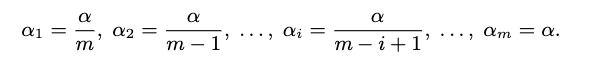


Для того, чтобы выявить статистически значимую разницу между тестовой и контролями группами исследовались 16 (4*4) гипотез:
- сравнение первой контрольной группы 246 и 247 (по каждому из 4 событый); 
- сравнение первой контрольной группы 246 и тестовой группы (по каждому из 4 событый); 
- сравнение второй контрольной группы 247 и тестовой группы (по каждому из 4 событый); 
- сравнение объединённой контрольной группы и тестовой группы (по каждому из 4 событый).


Проверим есть ли статистически значимые отличия, используя метод Холма.

In [42]:
#statistical_significance(event_users_group, 'A', 'B', alpha=.05/3)
#print('-'*25)
#statistical_significance(event_users_group, 'A1', 'B', alpha=.05/2)
#print('-'*25)
#statistical_significance(event_users_group, 'A+A1', 'B', alpha=.05)

Дополню функцию параметром for_method. При значении True функция выведет список со списками значений p-value по каждому событию для указанных в параметрах group_1 и group_2 групп.

In [43]:
def statistical_significance (df, group_1, group_2, alpha, for_method=False):
#создадим переменную в которую будут помещаться значения p-value при выполнении цикла    
    p_v = []
    event = ['MainScreenAppear', 'OffersScreenAppear', 'CartScreenAppear', 'PaymentScreenSuccessful']
    for x in event:
        event_df = df[df['event_name'] == x]
        successes1 = event_df[group_1]
        successes2 = event_df[group_2]
        trials1 = df[group_1].iloc[0]
        trials2 = df[group_2].iloc[0]

        successes = np.array([successes1, successes2])
        trials = np.array([trials1, trials2])

        p1 = successes[0]/trials[0]
        p2 = successes[1]/trials[1]
    
        p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])

        difference = p1 - p2 

        z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))
        
        distr = st.norm(0, 1)  
        p_value = (1 - distr.cdf(abs(z_value))) * 2
        
        p_v.append(p_value)#наполним список
        
#при значении False функция выведет необходимую информацию по тесту(без изменений)        
        if for_method == False:  
            print('Между группами', group_1, 'и', group_2, 'По событию', x)
            print('p-значение: ', p_value)
            if p_value < alpha:
                print('Отвергаем H0: между долями есть значимая разница')
                print(' ')
            else:
                print('\033[1m' + 'Не получилось отвергнуть H0: нет оснований считать доли разными' + '\033[0m')
                print(' ')
#при значении True функция выведет список со списками значений p-value по каждому событию
    if for_method == True:
        return p_v


In [44]:
#применим функцию со значением True в параметре for_method для каждой комбинации групп
#и изменим тип значений в списке с из массива array() на float
p_aa1 = statistical_significance(event_users_group, 'A', 'A1', alpha=.05, for_method=True)
p_aa1 = [float(p_aa1) for p_aa1 in p_aa1]

p_ab = statistical_significance(event_users_group, 'A', 'B', alpha=.05, for_method=True)
p_ab = [float(p_ab) for p_ab in p_ab]

p_a1b = statistical_significance(event_users_group, 'A1', 'B', alpha=.05, for_method=True)
p_a1b = [float(p_a1b) for p_a1b in p_a1b]

p_aa1b = statistical_significance(event_users_group, 'A+A1', 'B', alpha=.05, for_method=True)
p_aa1b = [float(p_aa1b) for p_aa1b in p_aa1b]

#заполним список с названиями событий в том порядке, в котором события указаны в функции
#сложим 4 раза списки в соответствии с кол-вом комбинаций
list_event = ['MainScreenAppear', 'OffersScreenAppear', 'CartScreenAppear', 'PaymentScreenSuccessful']
list_event = list_event + list_event + list_event + list_event

#объеденим списки
p_pd = p_aa1 + p_ab + p_a1b + p_aa1b

#создадим на основе вышесоставленных объедененных списков таблицу
my_df1 = pd.DataFrame(
    {'event_name': list_event, 'p-value': p_pd, 'group': ['aa1', 'aa1', 'aa1', 'aa1',
                                                                           'ab', 'ab', 'ab', 'ab',
                                                                           'a1b', 'a1b', 'a1b', 'a1b',
                                                                           'aa1b', 'aa1b', 'aa1b', 'aa1b']}
).sort_values('p-value')

#рассчитаем значение p-value для метода холмса(при p-value=0.05)
p_value=0.05
my_df1['alpha_holm'] = [p_value/(len(my_df1)-x) for x in range(16)]
my_df1['alpha_holm'] = [f'{x:.4}' for x in my_df1['alpha_holm']]
my_df1['p-value'] = [f'{x:.4}' for x in my_df1['p-value']]

#создадим новый столбец результатом, если p-value < alpha_holm - H0 отвергаем, следовательно различия в группах есть,
#если p-value > alpha_holm - нет остнований отвергать H0, следовательно, нет оснований считать доли разными
my_df1['p-value < alpha_holm'] = my_df1['p-value'] < my_df1['alpha_holm']
my_df1

,event_name,p-value,group,alpha_holm,p-value < alpha_holm
6,CartScreenAppear,0.08067,ab,0.003125,False
3,PaymentScreenSuccessful,0.1145,aa1,0.003333,False
14,CartScreenAppear,0.1868,aa1b,0.003571,False
5,OffersScreenAppear,0.2144,ab,0.003846,False
7,PaymentScreenSuccessful,0.2169,ab,0.004167,False
2,CartScreenAppear,0.2287,aa1,0.004545,False
1,OffersScreenAppear,0.2479,aa1,0.005,False
4,MainScreenAppear,0.3387,ab,0.005556,False
12,MainScreenAppear,0.3487,aa1b,0.00625,False
13,OffersScreenAppear,0.4458,aa1b,0.007143,False


В результате созданной таблицы по каждому событию каждой из комбинаций групп (т.е. по кажой из 16 гипотез) p-значение с поправкой Холма идентичен предыдущим и больше уровня критической значимости, следовательно, нулевую гипотезу нет оснований отвергать все нулевые гипотезы.

In [45]:
a_a1 = statistical_significance(event_users_group, 'A', 'A1', alpha=.05, for_method=True)
a_b = statistical_significance(event_users_group, 'A', 'B', alpha=.05, for_method=True)
a1_b = statistical_significance(event_users_group, 'A1', 'B', alpha=.05, for_method=True)
a_a1_b = statistical_significance(event_users_group, 'A+A1', 'B', alpha=.05, for_method=True)

ab = a_a1 + a_b + a1_b + a_a1_b
a =[float(ab) for ab in ab]


print(sorted(a))
print(' ')
print("FWER: " + str(multipletests(sorted(a), alpha=0.05, 
                    method='holm', is_sorted = True)))

[0.08067367598823139, 0.11446627829276612, 0.18683558686831558, 0.21442476639710506, 0.21693033984516674, 0.22867643757335676, 0.24786096925282264, 0.3387114076159288, 0.3486684291093256, 0.44582745409482394, 0.5194964354051703, 0.5878284605111943, 0.6107918742187335, 0.7275718682261119, 0.7526703436483038, 0.9333751305879443]
 
FWER: (array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False]), array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]), 0.0032006977101884937, 0.003125)


В любом случае результаты не изменились, так как p-value по всем гипотезам было больше значения alpha=0.05, а при поправках значение alpha уменьшается. 

Результат с поправкой Холма идентичен предыдущим.

Следовательно, можно сделать вывод, что **статистически значимых различий между контрольными группами и тестовой группой нет.**



**Выводы по разделу**

- в контрольной группе 246 при тестировании учувствует 2483 пользователей, в контрольной группе 247 - 2512 пользователя, в тестовой группе 248 - 2535 пользователя.

- Статистически значимых различий между контрольными группами нет.

- Статистически значимых различий между контрольной группой 246 и тестовой группой нет.

- Статистически значимых различий между контрольной группой 247 и тестовой группой нет.

- Статистически значимых различий между объединенной контрольной группой и тестовой группой нет.

- После применения поправки Холма статистически значимых различий между контрольными и тестовой группами, также, обнаружено не было.

### Результаты исследования
<a id="rec"></a> 

Исследование проводилось по данным за период с 01.08.2019 по 07.08.2019.

**В исследовании рассматривалось 5 уникальных событий ['Tutorial', 'MainScreenAppear', 'OffersScreenAppear', 'CartScreenAppear', 'PaymentScreenSuccessful'], исходя из которых была сформирована следующая воронка событий:**
- MainScreenAppear - Появится главный экран
- OffersScreenAppear - Появится экран предложений
- CartScreenAppear - Появится экран корзины
- PaymentScreenSuccessful - Экран оплаты прошел успешно
    
    Событие Tutorial рекомендательное и было принято решение в воронку его включать, так как его доля в общем объеме ничтожна.


Так событие 'OffersScreenAppear' совершают 62% пользователей, событие 'CartScreenAppear' - 50% пользователей, событие 'PaymentScreenSuccessful' - 48% пользователей. Событие 'MainScreenAppear' совершили 98% пользователей. Также можно отметить, что 2% пользователей за весь временной интервал исследования не совершили данное действие. Возможно, у этих пользователей возникают каки-либо технические проблемы с приложением;

В среднем 62% пользователей проходят на шаг 'OffersScreenAppear' воронки событий от 'MainScreenAppear'; к следующему событию 'CartScreenAppear' в среднем проходит 81% пользователей; наибольший процент пользователей проходит от события 'CartScreenAppear' к событию 'PaymentScreenSuccessful', в среднем это 95% пользователей;
**Таким образом на шаге от 'MainScreenAppear' к 'OffersScreenAppear' теряется набольший процент пользователей - 38%.**

Доля пользователей, проходящих от первого события до оплаты: 47.7 %.

**Для проведения А/А/В тестирования в контрольной группе 246 учувствует 2483 пользователей, в контрольной группе 247 - 2512 пользователя, в тестовой группе 248 - 2535 пользователя.**

При проверке между выборками двух контрольных групп статистически значимых различий выявлено не было.

При исследовании контрольных и тестовых групп было составлено 16 гипотез:
- сравнение первой контрольной группы 246 и 247 (по каждому из 4 событый); 
- сравнение первой контрольной группы 246 и тестовой группы (по каждому из 4 событый); 
- сравнение второй контрольной группы 247 и тестовой группы (по каждому из 4 событый); 
- сравнение объединённой контрольной группы и тестовой группы (по каждому из 4 событый).

**По результатам А/В тестирования все гипотезы отвергнуты не были, а следовательно, значимых различий между контрольными и тестовой группами выявлено не было.**

Также для снижения вероятности ложнопозитивного результата при множественном тестировании гипотез, был использован метод Холма. С поправками Холма различий между контрольными и тестовой группами, также, выявлено не было.

**Таким образом результаты А/А/В тестирования не подтвердили эффективность какого-либо из шрифтов.**